## cells for recompiling and loading packages

In [2]:
Pkg.status("Phylo")

Status `~/.julia/environments/v1.9/Project.toml`
  [aea672f4] Phylo v0.5.2


In [72]:
Pkg.instantiate()
Pkg.precompile()

Precompiling project...
  ✓ BioUtils
  1 dependency successfully precompiled in 6 seconds. 257 already precompiled.
  1 dependency precompiled but a different version is currently loaded. Restart julia to access the new version


In [1]:
using BioUtils
Pkg.status("BioUtils")
util_list_pkg_functions(BioUtils)

Status `~/.julia/environments/v1.9/Project.toml`
  [ceb6e143] BioUtils v1.0.0-DEV `../../../Desktop/git_repos/BioUtils`


20-element Vector{Any}:
 :fasta_read
 :fasta_write
 :tree_ali_aa_plot
 :tree_ali_clade_discriminating_columns
 :tree_ali_clade_partition
 :tree_ali_discriminating_columns
 :tree_ali_nu_plot
 :tree_ladderize!
 :tree_plot
 :tree_reroot!
 :tree_set_clades!
 :tree_simple_plot
 :tree_to_binary!
 :util_get_longest_orf
 :util_list_pkg_functions
 :util_remove_ns
 :util_remove_xs
 :util_replace_gaps_with_ns
 :wrap_fasttree
 :wrap_mafft

## 02-DataStructures

In [1]:
#  FASTX, CodecZlib, 
using BioSymbols, BioSequences, Phylo, Plots, Colors, BioUtils #Logging, StatsBase 

[ Info: Precompiling BioUtils [ceb6e143-b758-49f8-aaab-a89d1f17efc6]


In [2]:
Pkg.status()

Project BioUtils v1.0.0-DEV
Status `~/Desktop/git_repos/BioUtils/Project.toml`
  [7e6ae17a] BioSequences v3.1.6
  [3c28c6f8] BioSymbols v5.1.3
  [944b1d66] CodecZlib v0.7.4
  [5ae59095] Colors v0.12.10
  [c2308a5c] FASTX v2.1.5
⌃ [aea672f4] Phylo v0.5.1
  [91a5bcdd] Plots v1.40.4
  [2913bbd2] StatsBase v0.34.3
  [56ddb016] Logging
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [3]:
util_list_pkg_functions(BioUtils)

24-element Vector{Any}:
 :fasta_read
 :fasta_write
 :tree_ali_aa_plot
 :tree_ali_clade_discriminating_columns
 :tree_ali_clade_partition
 :tree_ali_discriminating_columns
 :tree_ali_nu_plot
 :tree_ladderize!
 :tree_plot
 :tree_reroot!
 :tree_set_clades!
 :tree_set_visits!
 :tree_simple_plot
 :tree_to_binary!
 :util_consensus
 :util_get_longest_orf
 :util_list_pkg_functions
 :util_make_mafft_merge_table
 :util_remove_ns
 :util_remove_xs
 :util_replace_gaps_with_ns
 :wrap_fasttree
 :wrap_mafft
 :wrap_mafft_merge

In [4]:
s1= Set(util_list_pkg_functions(BioSequences));
s2= Set(util_list_pkg_functions(Plots));
intersect(s1,s2)

Set{Any} with 2 elements:
  :translate
  :translate!

In [5]:
util_list_pkg_functions(BioSymbols)

14-element Vector{Any}:
 :alphabet
 :compatbits
 :complement
 :encode
 :encoded_data
 :gap
 :isGC
 :isambiguous
 :iscertain
 :iscompatible
 :isgap
 :ispurine
 :ispyrimidine
 :stringbyte

In [6]:
alphabet(DNA)

(DNA_Gap, DNA_A, DNA_C, DNA_M, DNA_G, DNA_R, DNA_S, DNA_V, DNA_T, DNA_W, DNA_Y, DNA_H, DNA_K, DNA_D, DNA_B, DNA_N)

In [7]:
alphabet(AminoAcid)

(AA_A, AA_R, AA_N, AA_D, AA_C, AA_Q, AA_E, AA_G, AA_H, AA_I, AA_L, AA_K, AA_M, AA_F, AA_P, AA_S, AA_T, AA_W, AA_Y, AA_V, AA_O, AA_U, AA_B, AA_J, AA_Z, AA_X, AA_Term, AA_Gap)

In [8]:
@show BioSequences.translate(randseq(DNAAlphabet{4}(), 54));

BioSequences.translate(randseq(DNAAlphabet{4}(), 54)) = LRGFIQHSRDRVHNNCIV


In [9]:
seq=LongSequence{DNAAlphabet{4}}("TTAGC")

5nt DNA Sequence:
TTAGC

In [10]:
dna"ACGTGTCA"

8nt DNA Sequence:
ACGTGTCA

In [11]:
seq=randdnaseq(48)

48nt DNA Sequence:
GATCCCCGTCCGCGGAGCACAGCTTTGAAAACGGGGGGGCCGGGAATA

In [12]:
union(seq)

4-element Vector{DNA}:
 DNA_G
 DNA_A
 DNA_T
 DNA_C

## 03-FileHandling

In [13]:
(seqs,nams,descs)=fasta_read("data/mammals/mammals.fasta");

In [14]:
union(seqs[1])

6-element Vector{DNA}:
 DNA_A
 DNA_T
 DNA_G
 DNA_C
 DNA_N
 DNA_Gap

In [15]:
length(seqs[1])

21510

In [16]:
findall(AA_Term,BioSequences.translate(util_replace_gaps_with_ns(seqs[1])))

66-element Vector{Int64}:
  478
  776
  960
 1123
 2678
 3073
 3101
 3144
 3149
 3154
 3197
 3202
 3235
    ⋮
 4254
 4278
 4284
 4288
 4295
 4302
 4304
 4358
 5759
 6361
 6797
 7169

In [17]:
BioSequences.translate(util_replace_gaps_with_ns(seqs[1]))[3145:3149]

5aa Amino Acid Sequence:
WPNN*

In [18]:
t=util_remove_ns(util_replace_gaps_with_ns(seqs[1]))

20647nt DNA Sequence:
ATGGCGGCGAGCGCGCTGCGAGGCCTGCCAGTGGCTGGC…AAGGCCCCCAAGAACGCTGACTGGACAACCGCTACATGA

In [19]:
println(BioSequences.translate(t[1:3*div(length(t),3)]))

MAASALRGLPVAGGGESSESEDDGWEIGYLDRTSQKLKRLLPIEEKKEKFKKAMTIGDVSLVQELLDSGISVDSNFQYGWTPLMYAASVANAELVRVLLDRGANASFEKDKQSILITSAHGSEEQILKCVELLLSRNADPNVACRRLMTPIMYAARDGHTQVVALLVAHGAEVNTQDENGYTALTWAARQGHKNIVLKLLELGANKMLQTKDGKMPSEIAKRNKHHEIFNLLSFTLNPLEGKLQQLTKEDTICKILTTDSDREKDHIFSSYTAFGDLTDLLKERDITLRHLLTMREDEFTKNGITSKDQQKILAALKELQVEEIQFGELSEETKLEISGDEFLNFLLKLNKQCGHLITAVQNVITELPVNSQKITLEWASPQNFTSVCEELVNNVEDLSEKVCKLKDLIQKLQNERENDPTHIQLREEVSTWNSRILKRTAITICGFGFLLFICKLTFQRK*MADLEEQLSDEEKVRIAAKFIIHAPPGEFNEVFNDVRLLLNNDNLLREGAAHAFAQYNLDQFTPVKIEGYEDQVLITEHGDLGNGKFLDPKNRICFKFDHLRKEATDPRPCEVENAVESWRTSVETALRAYVKEHYPNGVCTVYGKKIDGQQTIIACIESHQFQAKNFWNGRWRSEWKFTITPSTTQVVGILKIQVHYYEDGNVQLVSHKDIQDSLTVSNEVQTAKEFIKIVEAAENEYQTAISENYQTMSDTTFKALRRQLPVTRTKIDWNKILSYKIGKEMQNA*MSGGKYVDSEGHLYTVPIREQGNIYKPNNKAMADELSEKQVYDAHTKEIDLVNRDPKHLNDDVVKIDFEDVIAEPEGTHSFDGIWKASFTTFTVTKYWFYRLLSALFGIPMALIWGIYFAILSFLHIWAVVPCIKSFLIEIQCISRVYSIYVHTVCDPLFEAVGKIFSNVRINLQKEI*MGLETEKADVQLFMDDDSYSHHSGLEYADPDSDQDRDPHRLNSHLKLGFEDVIAEPVTTHSFDKVWICSHAL

In [20]:
nams

44-element Vector{StringViews.StringView{SubArray{UInt8, 1, Vector{UInt8}, Tuple{UnitRange{Int64}}, true}}}:
 "human"
 "chimp"
 "gorilla"
 "orangutan"
 "gibbon"
 "colobus_monkey"
 "vervet"
 "baboon"
 "macaque"
 "dusky_titi"
 "owl_monkey"
 "squirrel_monkey"
 "marmoset"
 ⋮
 "cow"
 "horse"
 "armadillo"
 "elephant"
 "tenrec"
 "wallaby"
 "monodelphis"
 "opossum"
 "platypus"
 "chicken"
 "fugu"
 "tetra"

In [21]:
ungap.(seqs)

44-element Vector{LongSequence{DNAAlphabet{4}}}:
 ATGGCGGCGAGCGCGCTGCGAGGCCTGCCAGTGGCTGGC…GCCCCCAAGAACGCTGACTGGACAACCGCTACATGANNN
 ATGGCGGCGAGCGCGCTGCGAGGCCTGCCAGTGGCTGGC…GCCCCCAAGAACGCTGACTGGACAACCCCTACATGANNN
 ATGGCGGCGAGCGCGCTGCGAGGCCCGCCAGTGGCTGGC…GCCCCAAAGAACGCTGACTGGACAACCCCTACATGANNN
 ATGGCGGCGGGCGCGCTACGCGGCCTGCCTGTGGCCGGC…GCCCCCAAGAACGCTGACTGGACAACCCCTACATGANNN
 ATGGCGGCGGGCGCGCTCCGCGGCCTGCCAGTGGCTGGC…GCCCCCAAGAACGCTGACTGGACAACCCCTACATGANNN
 ATGGCGGCGGGCGCGCTACGCGGCCTGCCAGTGGCCGGC…GCCCCCAAGAACGCTGACTGGACAACCCCCACATGANNN
 ATGGCGGCGGGAGCGCTACGCGGCCTGCCAGTGGCCGGC…GCCCCCAAGAATGCTGACTGGACAACCCCCACATGANNN
 ATGGCGGCGGGAGCGCTACGCGGCCTGCCAGTGGCCGGC…GCCCCCAAGAACGCTGACTGGACAACCCCCACATGANNN
 ATGGCGGCGGGAGGGCTACGCGGCCTGCCAGTGGCCGGC…GCCCCCAAGAACGCTGACTGGACAACCCCCACATGANNN
 ATGGCGGCGAGCGCACTACGAGGCCTGGCAGTGGCCGGT…GCACCCAAGAACGCTGACTGGACAACCCCCACATGANNN
 ATGGCGGCGAGAGCGCTACGCGGCCCGGCAGTAGCCGGT…GCACCCAAGAACGCTGACTGGACAAGCCCCACATGANNN
 ATGGCGGCGAGCGCACTACGCGGCCTGGCAGTGGCGGGT…TGTAAGAAGATGATGTCTT

In [22]:
typeof(seqs[1])

LongSequence{DNAAlphabet{4}}

In [23]:
string.(seqs)

44-element Vector{String}:
 "ATGGCGGCGAGCGCGCTGCGAGGCCTGCCA" ⋯ 21451 bytes ⋯ "ACGCTGACTGGACAACCGCTACATGANNN"
 "ATGGCGGCGAGCGCGCTGCGAGGCCTGCCA" ⋯ 21451 bytes ⋯ "ACGCTGACTGGACAACCCCTACATGANNN"
 "ATGGCGGCGAGCGCGCTGCGAGGCCCGCCA" ⋯ 21451 bytes ⋯ "ACGCTGACTGGACAACCCCTACATGANNN"
 "ATGGCGGCGGGCGCGCTACGCGGCCTGCCT" ⋯ 21451 bytes ⋯ "ACGCTGACTGGACAACCCCTACATGANNN"
 "ATGGCGGCGGGCGCGCTCCGCGGCCTGCCA" ⋯ 21451 bytes ⋯ "ACGCTGACTGGACAACCCCTACATGANNN"
 "ATGGCGGCGGGCGCGCTACGCGGCCTGCCA" ⋯ 21451 bytes ⋯ "ACGCTGACTGGACAACCCCCACATGANNN"
 "ATGGCGGCGGGAGCGCTACGCGGCCTGCCA" ⋯ 21451 bytes ⋯ "ATGCTGACTGGACAACCCCCACATGANNN"
 "ATGGCGGCGGGAGCGCTACGCGGCCTGCCA" ⋯ 21451 bytes ⋯ "ACGCTGACTGGACAACCCCCACATGANNN"
 "ATGGCGGCGGGAGGGCTACGCGGCCTGCCA" ⋯ 21451 bytes ⋯ "ACGCTGACTGGACAACCCCCACATGANNN"
 "ATGGCGGCGAGCGCACTACGAGGCCTGGCA" ⋯ 21451 bytes ⋯ "ACGCTGACTGGACAACCCCCACATGANNN"
 "ATGGCGGCGAGAGCGCTACGCGGCCCGGCA" ⋯ 21451 bytes ⋯ "ACGCTGACTGGACAAGCCCCACATGANNN"
 "ATGGCGGCGAGCGCACTACGCGGCCTGGCA" ⋯ 21451 bytes ⋯ "--------------------

In [24]:
fasta_write("data/mammals/mammals_ungapped.fasta",
    util_remove_ns.(util_replace_gaps_with_ns.(seqs[1:end])),names=nams[1:end])

## 04-Wrappers

In [25]:
wrap_mafft("data/mammals/mammals_ungapped.fasta","data/mammals/mammals_aligned.fasta")

`mafft-fftns --quiet --thread 2 --ep 2 --op 3 --out data/mammals/mammals_aligned.fasta data/mammals/mammals_ungapped.fasta`


Process(`mafft-fftns --quiet --thread 2 --ep 2 --op 3 --out data/mammals/mammals_aligned.fasta data/mammals/mammals_ungapped.fasta`, ProcessExited(0))

In [26]:
wrap_fasttree("data/mammals/mammals_aligned.fasta","data/mammals/mammals_tree.tre");

`fasttree -quiet -nt -nosupport -gamma -out data/mammals/mammals_tree.tre data/mammals/mammals_aligned.fasta`


## 05-Phylogenies

### simple bifurcating trees

In [27]:
simpletree = parsenewick("(ant:17, (bat:31, cow:22):7, dog:22, (elk:33, fox:12):40):10;")
(x->println(x.id," -> ",x.name)).(getnodes(simpletree, preorder));

9 -> Node 9
5 -> dog
4 -> Node 4
3 -> cow
2 -> bat
8 -> Node 8
6 -> elk
7 -> fox
1 -> ant


In [28]:
ms=(ones(9).*8).+((x->heighttoroot(simpletree,x)).(getnodes(simpletree, preorder)).+1)./10

9-element Vector{Float64}:
  8.1
 10.3
  8.8
 11.0
 11.9
 12.1
 15.4
 13.3
  9.8

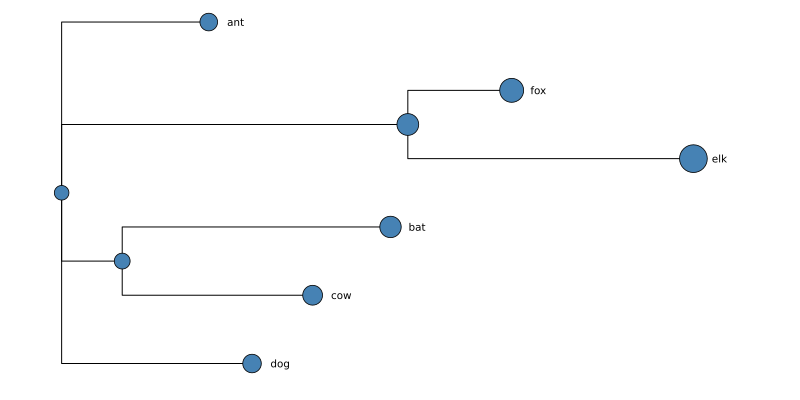

In [29]:
plot(simpletree,size=(800,400),markersize=ms,showmarkers=true, markercolor = :steelblue, markerstrokecolor = :black)

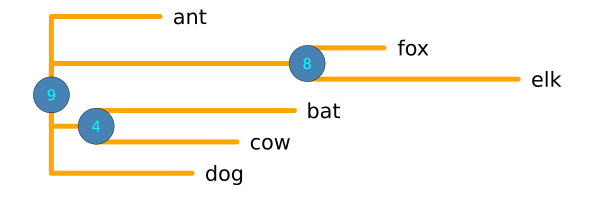

In [30]:
tree_simple_plot(simpletree)

In [31]:
getchildren(simpletree,getroot(simpletree))

4-element Vector{RecursiveNode{OneRoot, String, Dict{String, Any}, Dict{String, Any}, PolytomousBranching, Float64}}:
 internal node 'dog'
 leaf node 'Node 4'
 leaf node 'Node 8'
 internal node 'ant'

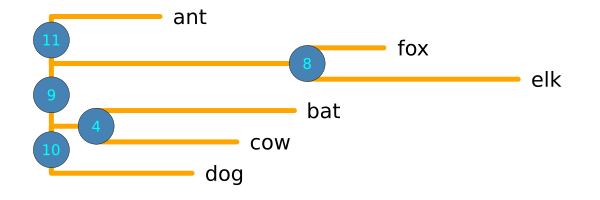

In [32]:
tree_to_binary!(simpletree)
tree_simple_plot(simpletree)

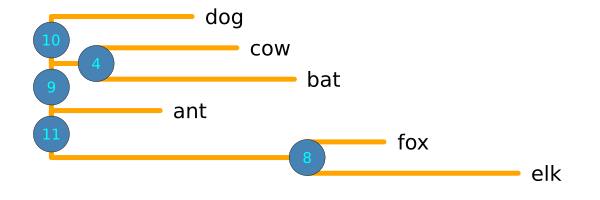

In [33]:
tree_ladderize!(simpletree, rev=true)
tree_simple_plot(simpletree)

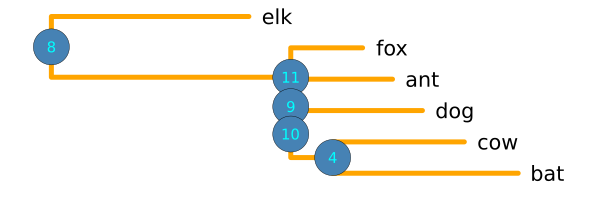

In [34]:
tree_reroot!(simpletree, getnode(simpletree,"Node 8"))
tree_simple_plot(simpletree)

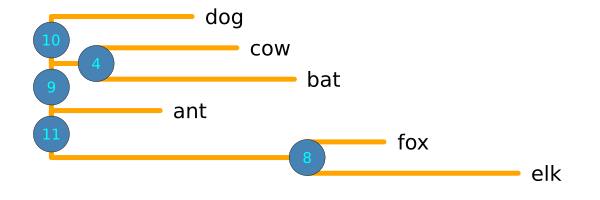

In [35]:
tree_reroot!(simpletree, getnode(simpletree,"Node 9"))
tree_simple_plot(simpletree)

### trees from sequence alignments

In [36]:
tree = open(parsenewick, "data/mammals/mammals_tree.tre");

In [37]:
tree_to_binary!(tree)

In [38]:
outgroup=["tetra","fugu","platypus","chicken"]
leaves=(x->x.name).(getleaves(tree))
ingroup=(x->getnode(tree,x)).(setdiff(Set(leaves),Set(outgroup)))

40-element Vector{RecursiveNode{OneRoot, String, Dict{String, Any}, Dict{String, Any}, PolytomousBranching, Float64}}:
 internal node 'ferret'
 internal node 'gibbon'
 internal node 'dusky_titi'
 internal node 'squirrel_monkey'
 internal node 'hedgehog'
 internal node 'rabbit'
 internal node 'orangutan'
 internal node 'armadillo'
 internal node 'vervet'
 internal node 'horse'
 internal node 'shrew'
 internal node 'elephant'
 internal node 'muntjak_indian'
 ⋮
 internal node 'sheep'
 internal node 'marmoset'
 internal node 'colobus_monkey'
 internal node 'guinea_pig'
 internal node 'mouse'
 internal node 'galago'
 internal node 'dog'
 internal node 'gorilla'
 internal node 'cat'
 internal node 'mouse_lemur'
 internal node 'pig'
 internal node 'chimp'

In [39]:
new_root=Phylo.mrca(tree,outgroup)

"Node 77"

In [40]:
tree_reroot!(tree,getnode(tree,new_root))

true

In [41]:
cut=round(heighttoroot(tree,getnode(tree,"horse")),digits=3)

0.187

In [42]:
tree_set_clades!(tree, cut)

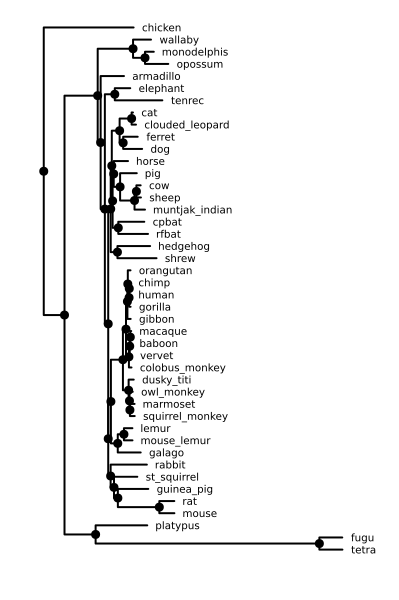

In [43]:
tree_plot(tree)

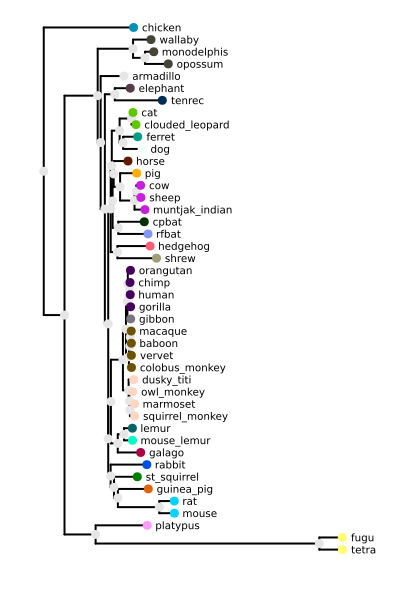

In [44]:
pl1=tree_plot(tree, showclades=true)

In [45]:
getleaves(tree, preorder)

44-element Vector{RecursiveNode{OneRoot, String, Dict{String, Any}, Dict{String, Any}, PolytomousBranching, Float64}}:
 internal node 'tetra'
 internal node 'fugu'
 internal node 'platypus'
 internal node 'mouse'
 internal node 'rat'
 internal node 'guinea_pig'
 internal node 'st_squirrel'
 internal node 'rabbit'
 internal node 'galago'
 internal node 'mouse_lemur'
 internal node 'lemur'
 internal node 'squirrel_monkey'
 internal node 'marmoset'
 ⋮
 internal node 'horse'
 internal node 'dog'
 internal node 'ferret'
 internal node 'clouded_leopard'
 internal node 'cat'
 internal node 'tenrec'
 internal node 'elephant'
 internal node 'armadillo'
 internal node 'opossum'
 internal node 'monodelphis'
 internal node 'wallaby'
 internal node 'chicken'

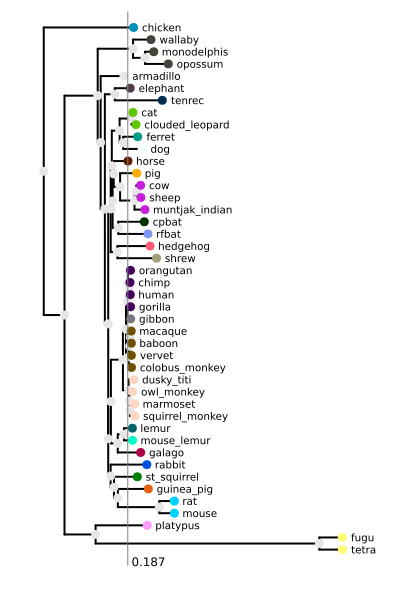

In [46]:
pl2=tree_plot(tree, showclades=true, showcut=true, showtips=true)

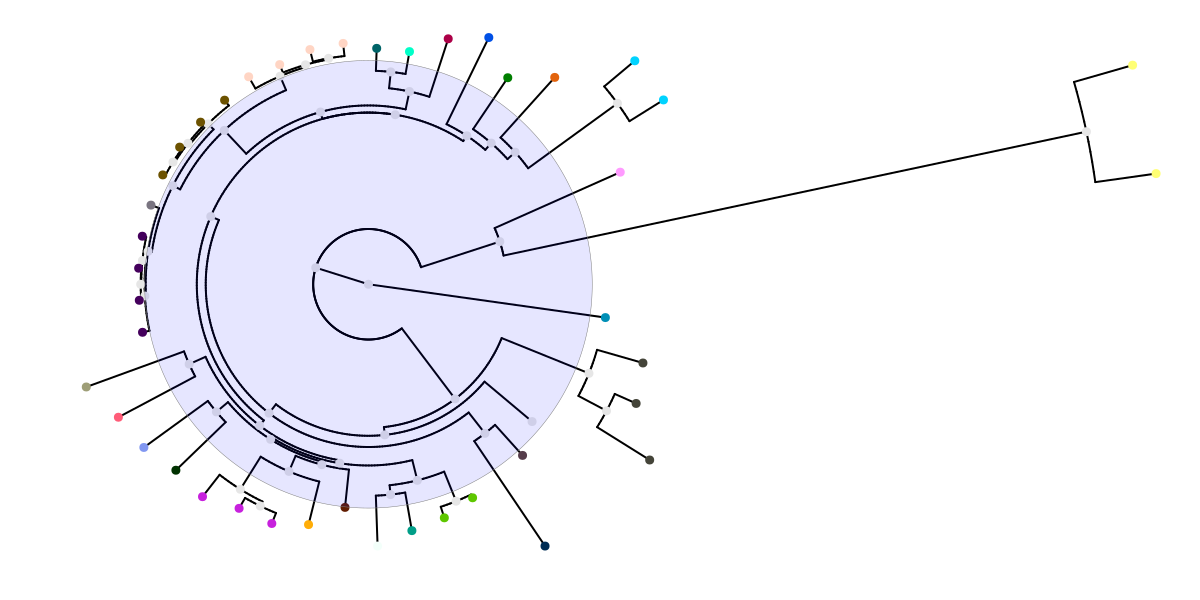

In [47]:
pl3=tree_plot(tree, showclades=true, showcut=true, treetype=:fan, showtips=false, size=(1200,600))

## 06-Heatmaps for alignments

In [48]:
(ali,nams)=fasta_read("data/mammals/mammals_aligned.fasta");
println(nams);

StringViews.StringView{SubArray{UInt8, 1, Vector{UInt8}, Tuple{UnitRange{Int64}}, true}}["human", "chimp", "gorilla", "orangutan", "gibbon", "colobus_monkey", "vervet", "baboon", "macaque", "dusky_titi", "owl_monkey", "squirrel_monkey", "marmoset", "galago", "mouse_lemur", "lemur", "rabbit", "st_squirrel", "guinea_pig", "rat", "mouse", "hedgehog", "shrew", "rfbat", "cpbat", "cat", "clouded_leopard", "ferret", "dog", "pig", "muntjak_indian", "sheep", "cow", "horse", "armadillo", "elephant", "tenrec", "wallaby", "monodelphis", "opossum", "platypus", "chicken", "fugu", "tetra"]


In [49]:
length(ali[1])

20937

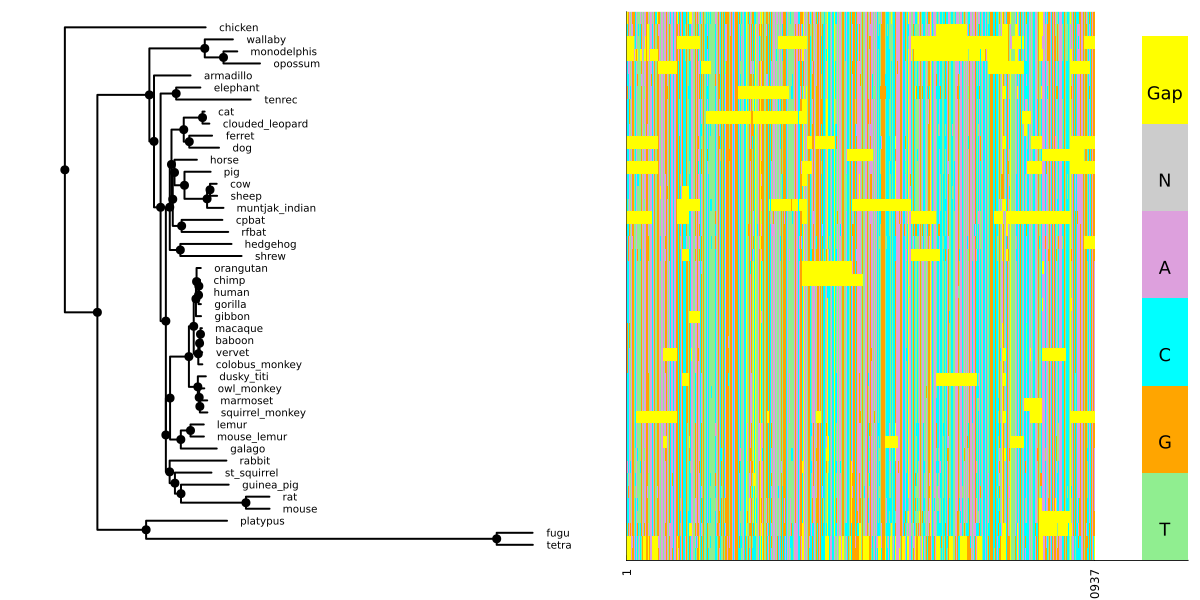

In [50]:
tree_ali_nu_plot(tree,ali,nams)

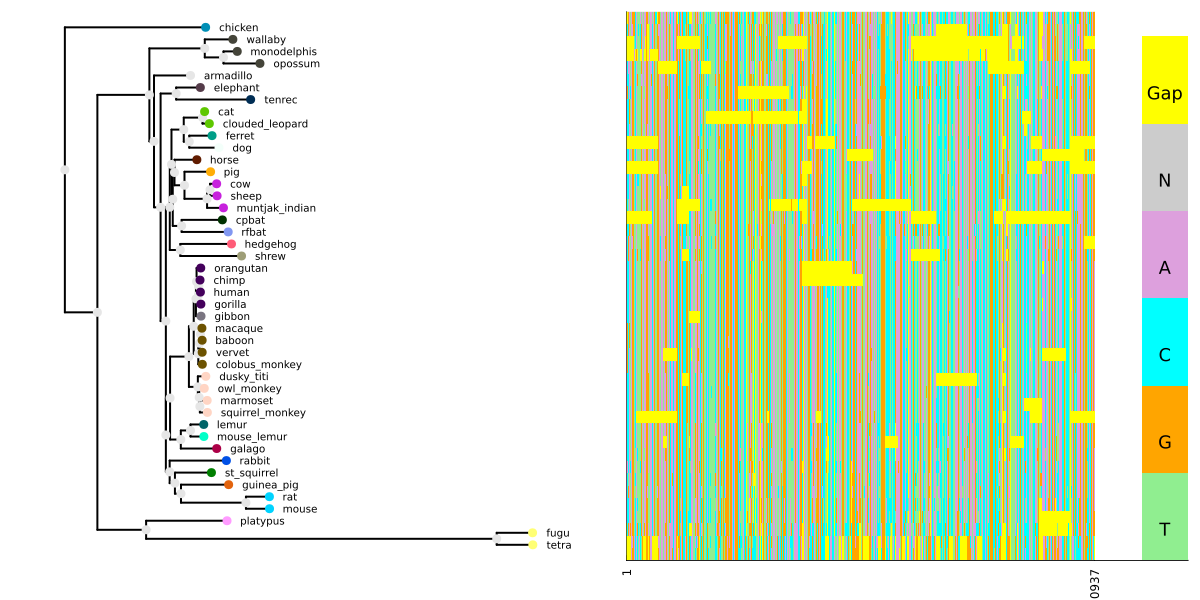

In [51]:
tree_ali_nu_plot(tree,ali,nams,showclades=true)

In [52]:
ubc=tree_ali_discriminating_columns(tree,ali,nams)
println(ubc);

Any[85, 217, 4, 368, 227, 53, 4, 113, 335, 5415, 6, 183, 13, 7, 81, 9, 1458, 13, 7, 28, 1137, 7, 9, 9, 21, 45, 1, 13, 1, 13, 6, 12, 12, 18, 4, 15, 135, 10, 1, 14, 26, 36, 69]


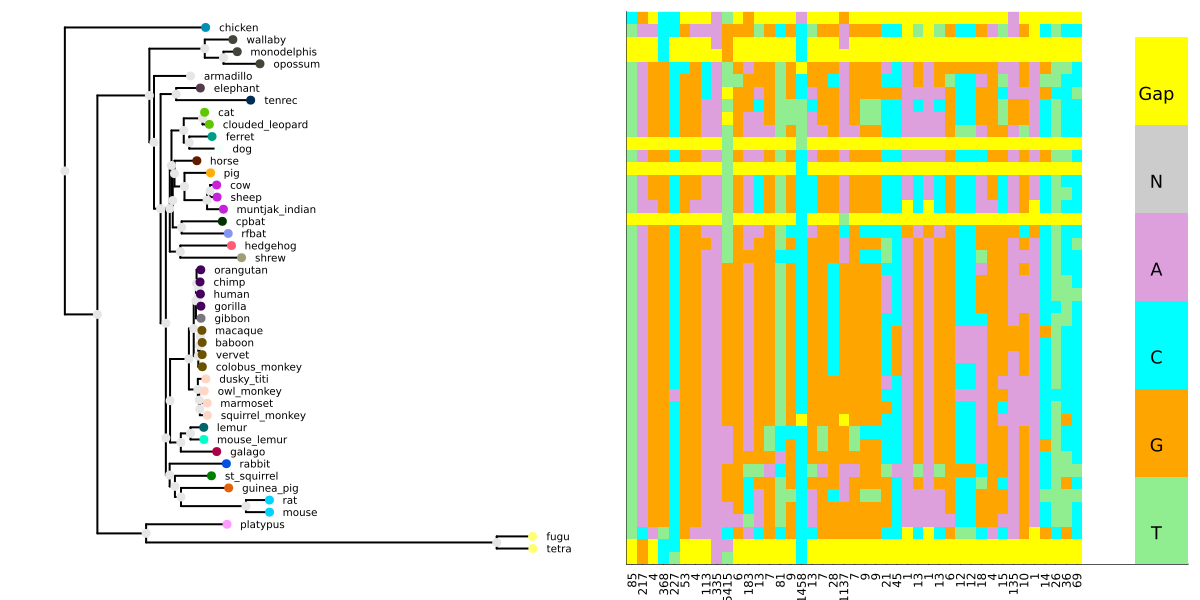

In [53]:
tree_ali_nu_plot(tree,ali,nams,showclades=true,coi=ubc)

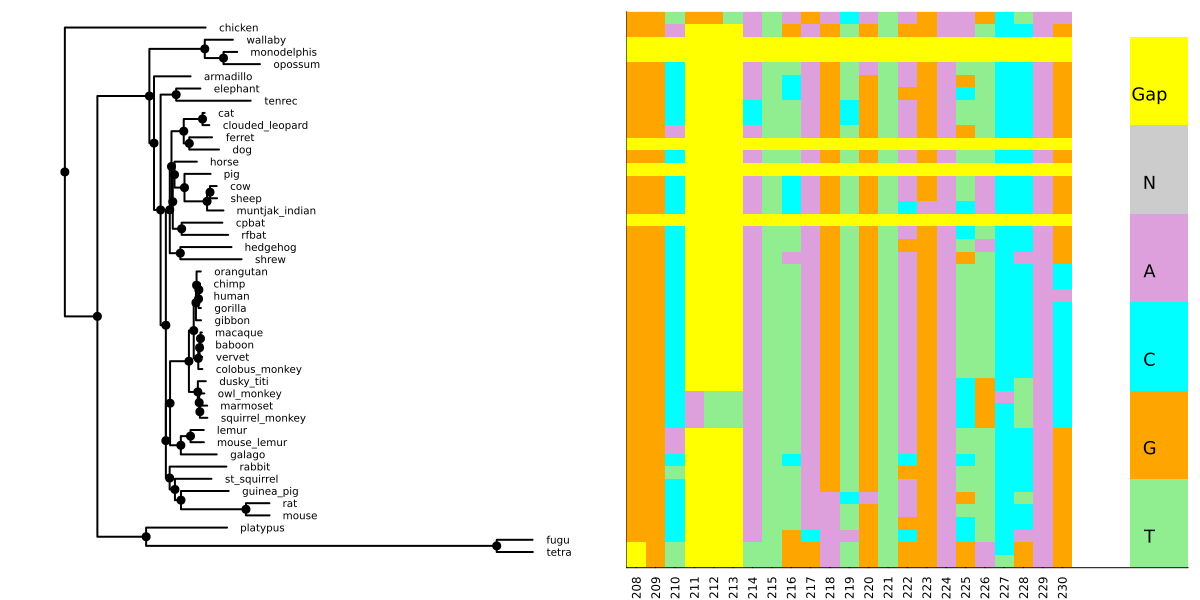

In [54]:
tree_ali_nu_plot(tree,ali,nams,coi=208:230)

In [55]:
tree_ali_clade_partition(tree,ali,nams,1)

(LongSequence{DNAAlphabet{4}}[---------------------------------------…AAGGGCCTGACGTGA------------------------, ---------------------------------------…AAGGGCCAGACGTGA------------------------], LongSequence{DNAAlphabet{4}}[ATGGCGGCGAGCGCGCTGCGAGGCCTGCCAGTGGCTGGC…AAGGCCCCCAAGAACGCTGACTGGACAACCGCTACATGA, ATGGCGGCGAGCGCGCTGCGAGGCCTGCCAGTGGCTGGC…AAGGCCCCCAAGAACGCTGACTGGACAACCCCTACATGA, ATGGCGGCGAGCGCGCTGCGAGGCCCGCCAGTGGCTGGC…AAGGCCCCAAAGAACGCTGACTGGACAACCCCTACATGA, ATGGCGGCGGGCGCGCTACGCGGCCTGCCTGTGGCCGGC…AAGGCCCCCAAGAACGCTGACTGGACAACCCCTACATGA, ATGGCGGCGGGCGCGCTCCGCGGCCTGCCAGTGGCTGGC…AAGGCCCCCAAGAACGCTGACTGGACAACCCCTACATGA, ATGGCGGCGGGCGCGCTACGCGGCCTGCCAGTGGCCGGC…AAGGCCCCCAAGAACGCTGACTGGACAACCCCCACATGA, ATGGCGGCGGGAGCGCTACGCGGCCTGCCAGTGGCCGGC…AAGGCCCCCAAGAATGCTGACTGGACAACCCCCACATGA, ATGGCGGCGGGAGCGCTACGCGGCCTGCCAGTGGCCGGC…AAGGCCCCCAAGAACGCTGACTGGACAACCCCCACATGA, ATGGCGGCGGGAGGGCTACGCGGCCTGCCAGTGGCCGGC…AAGGCCCCCAAGAACGCTGACTGGACAACCCCCACATGA, ATGGCGGCGAGCGCACTACGAGGCCTGGCAGTGGCCGGT…AAGGCACCC

In [56]:
clade_cols=tree_ali_clade_discriminating_columns(tree,ali,nams)
@show clade_cols;

clade_cols = Any[53, 214, 34, 123, 22, 25, 45, 81, 116, 636, 119, 2808, 2526, 4845, 11, 16, 1, 1137, 142, 2307, 42, 1440, 10, 214, 19, 6, 377, 85]


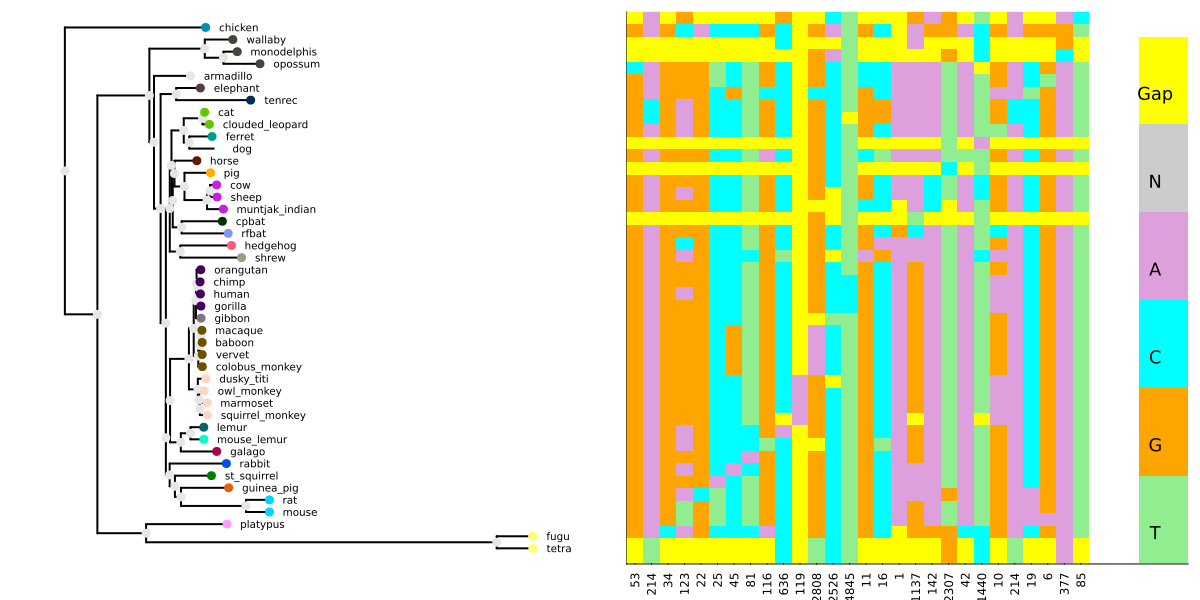

In [57]:
tree_ali_nu_plot(tree,ali,nams,showclades=true,coi=clade_cols)

## 07-Working with AA sequences

In [58]:
(nu_ali,nu_nams)=fasta_read("data/mammals/mammals.fasta");

In [59]:
fasta_write("data/mammals/mammals_aa.fasta",
                BioSequences.translate.(util_replace_gaps_with_ns.(nu_ali)),
                names=nu_nams)

In [60]:
(aa_ali,aa_nams)=fasta_read("data/mammals/mammals_aa.fasta",aa=true);

In [61]:
union(length.(aa_ali))

1-element Vector{Int64}:
 7170

In [62]:
fasta_write("data/mammals/mammals_aa_ungapped.fasta", util_remove_xs.(aa_ali), names=aa_nams)

In [63]:
wrap_mafft("data/mammals/mammals_aa_ungapped.fasta","data/mammals/mammals_aa_aligned.fasta")

`mafft-fftns --quiet --thread 2 --ep 2 --op 3 --out data/mammals/mammals_aa_aligned.fasta data/mammals/mammals_aa_ungapped.fasta`


Process(`mafft-fftns --quiet --thread 2 --ep 2 --op 3 --out data/mammals/mammals_aa_aligned.fasta data/mammals/mammals_aa_ungapped.fasta`, ProcessExited(0))

In [64]:
wrap_fasttree("data/mammals/mammals_aa_aligned.fasta","data/mammals/mammals_aa_tree.tre",aa=true)

`fasttree -quiet -nosupport -gamma -out data/mammals/mammals_aa_tree.tre data/mammals/mammals_aa_aligned.fasta`


Process(`fasttree -quiet -nosupport -gamma -out data/mammals/mammals_aa_tree.tre data/mammals/mammals_aa_aligned.fasta`, ProcessExited(0))

In [65]:
(aa_ali,aa_nams)=fasta_read("data/mammals/mammals_aa_aligned.fasta",aa=true);

In [66]:
aa_tree = open(parsenewick, "data/mammals/mammals_aa_tree.tre")
tree_to_binary!(aa_tree)
tree_ladderize!(aa_tree, rev=true)
aa_cut=floor(1000*minimum((x->heighttoroot(aa_tree,x)).(getleaves(aa_tree)))/2)/1000

0.02

In [67]:
tree_set_clades!(aa_tree, aa_cut)

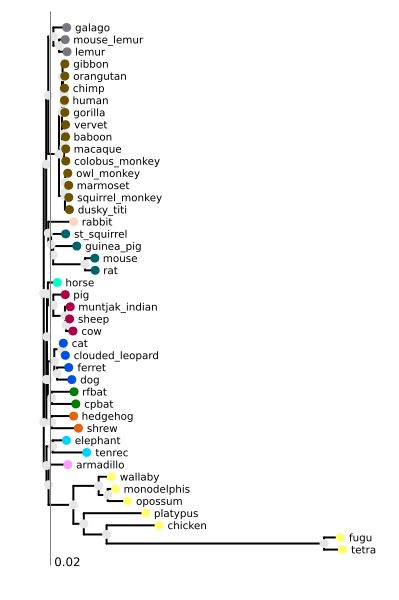

In [68]:
tree_plot(aa_tree, showcut=true, showclades=true)

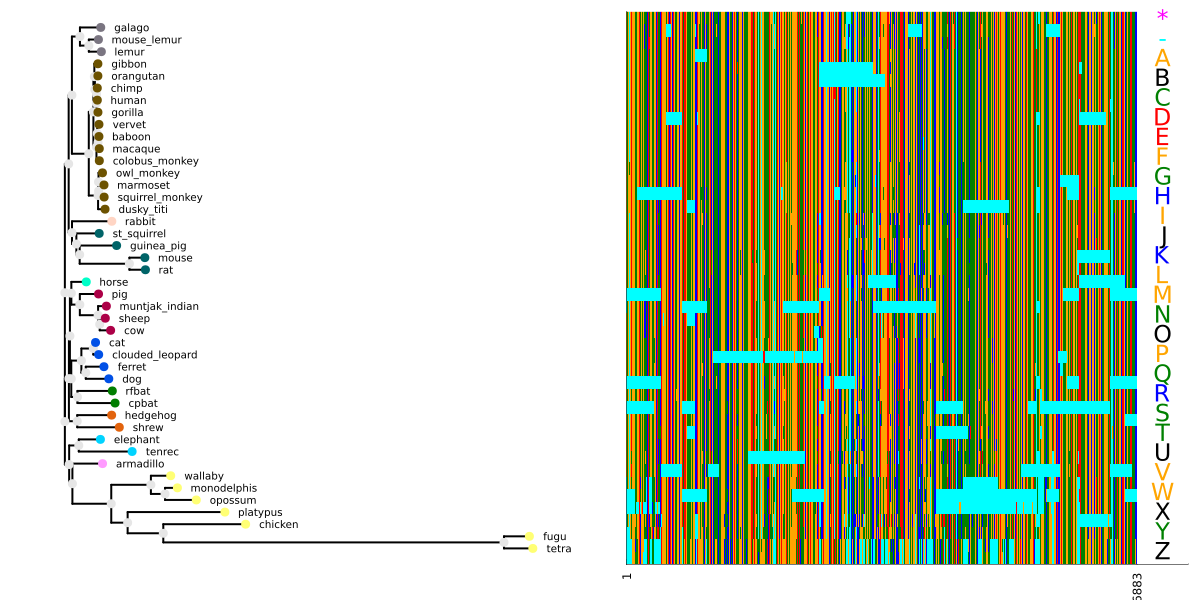

In [69]:
pl=tree_ali_aa_plot(aa_tree,aa_ali,aa_nams,showclades=true)

In [71]:
savefig(pl,"plots/mammals/tree_ali.svg")

"/Users/hughmurrell/Desktop/git_repos/BioUtils/notebooks/plots/mammals/tree_ali.svg"

In [72]:
best_cols = tree_ali_discriminating_columns(aa_tree,aa_ali,aa_nams,alpha=alphabet(AminoAcid))
@show best_cols;

best_cols = Any[3697, 2809, 64, 19, 5, 3, 33, 1, 4, 4, 1211, 5, 10, 3, 94, 425, 5, 5, 24, 113, 5, 2, 2, 1, 3, 2, 48, 4, 24, 125, 29, 111, 1, 5, 1, 64, 533, 4, 75, 19, 5, 9, 39]


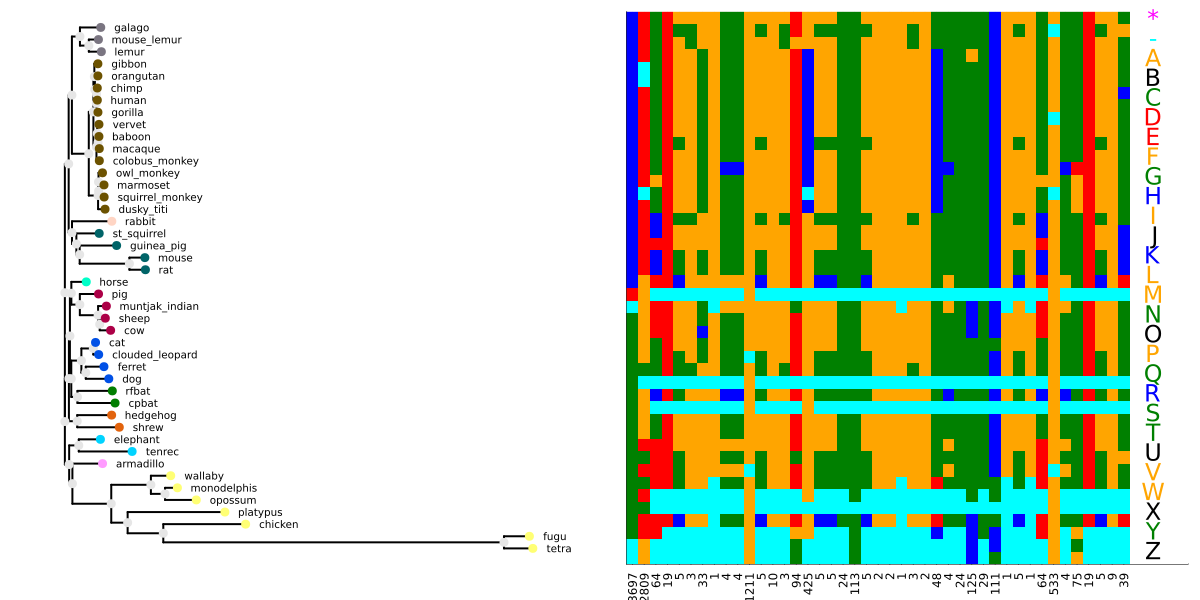

In [73]:
pl=tree_ali_aa_plot(aa_tree,aa_ali,aa_nams,coi=best_cols,showclades=true)

In [74]:
savefig(pl,"plots/mammals/tree_ali_dc.svg")

"/Users/hughmurrell/Desktop/git_repos/BioUtils/notebooks/plots/mammals/tree_ali_dc.svg"

In [75]:
clade_cols=tree_ali_clade_discriminating_columns(aa_tree,aa_ali,aa_nams, alpha=alphabet(AminoAcid))
@show clade_cols;

clade_cols = Any[117, 18, 39, 1474, 961, 904, 1117, 6, 325, 644, 50, 214]


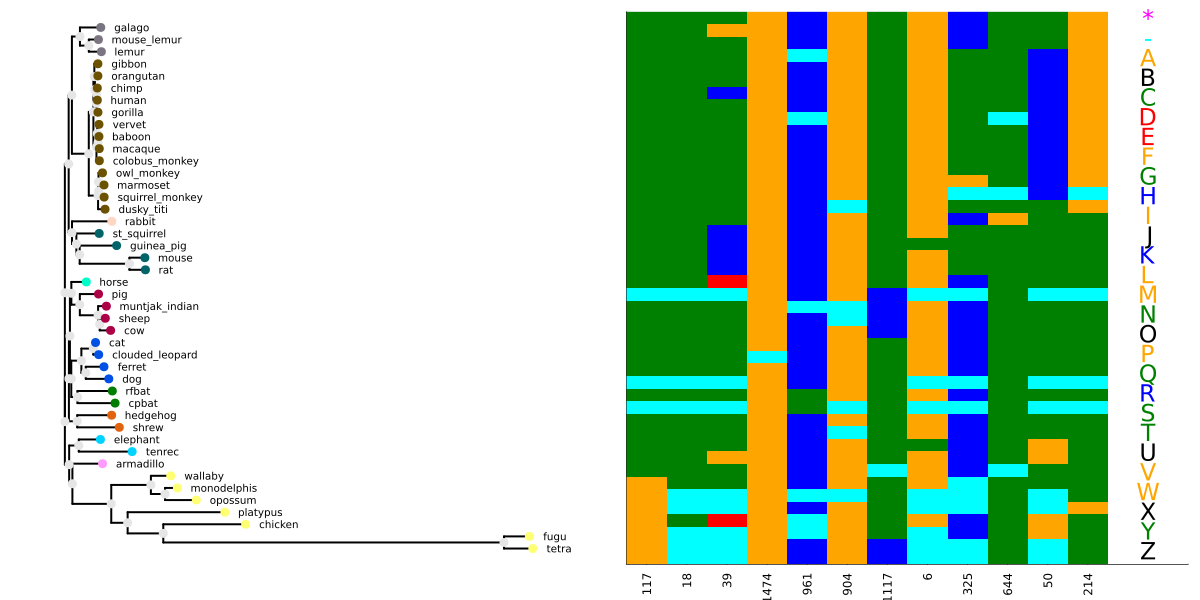

In [76]:
pl=tree_ali_aa_plot(aa_tree,aa_ali,aa_nams,coi=clade_cols,showclades=true)

In [77]:
savefig(pl,"plots/mammals/tree_ali_cdc.svg")

"/Users/hughmurrell/Desktop/git_repos/BioUtils/notebooks/plots/mammals/tree_ali_cdc.svg"

## HIV-ENV data from donor PC39

In [91]:
seq_test=randseq(DNAAlphabet{4}(),9999)
util_get_longest_orf(seq_test)

339nt DNA Sequence:
ATGCTAGGCACGACCAGTGAGCAAATGCATTCTTGCGCG…TCCAAAGATGTATCTTTACCAGGCACAATTCACAAGTGA

In [62]:
reverse(complement(dna"CCACTTGCCACCCATBTTATAGCA"))

24nt DNA Sequence:
TGCTATAAVATGGGTGGCAAGTGG

In [82]:
fwd_primer=ExactSearchQuery(dna"GAGCAGAAGACAGTGGCAATGA")

ExactSearchQuery{typeof(isequal), LongSequence{DNAAlphabet{4}}}(isequal, GAGCAGAAGACAGTGGCAATGA, 0x0000000000000116, 3, 2)

In [96]:
isnothing(findnext(fwd_primer, seqs[1], 1))

false

In [2]:
flea_dir="data/flea/"
file_names=readdir(flea_dir)
file_names=file_names[(x->endswith(x,".fasta")).(file_names)]
out_dir="data/flea/flea_aligned/"
mkpath(out_dir)
fwd_p=dna"GAGCAGAAGACAGTGGCAATGA"
rev_p=dna"TGCTATAAVATGGGTGGCAAGTGG"
fwd_primer=ExactSearchQuery(fwd_p)
rev_primer=ApproximateSearchQuery(rev_p)
for file in file_names
    @show(file)
    (seqs,nams,descs)=fasta_read(flea_dir*file)
    # if file==file_names[1]
    #     cons=consensus(seqs)
    #     fasta_write(out_file,[cons],names="consensus")
    # end
    new_nams = (x->file[1:end-6]*"_"*split(x)[2]).(descs)
    @show(length(seqs))
    w=10
    repeats=(x->contains(String(x),repeat("A",w)) ||
                contains(String(x),repeat("C",w)) ||
                contains(String(x),repeat("G",w)) ||
                contains(String(x),repeat("T",w))).(seqs)
    @show(sum(repeats))
    seqs=seqs[(!).(repeats)]
    nams=nams[(!).(repeats)]
    #lorfs=util_get_longest_orf.(seqs)
    #@show(median(length.(lorfs)))
    #keeps=(x->!isnothing(x)&&length(x)>500&&length(x)<700).(lorfs)
    #@show(sum(keeps))
    for i in 1:length(seqs)
        if !isnothing(findfirst(fwd_primer,reverse(complement(seqs[i]))))
            seqs[i]=reverse(complement(seqs[i]))
        end
    end
    fp=(x->!isnothing(findfirst(fwd_primer,x))).(seqs)
    @show(sum(fp))
    seqs=seqs[fp]
    nams=nams[fp]
    seqs=(x->x[findfirst(fwd_primer,x)[1]:end]).(seqs)
    rp=(x->!isnothing(findfirst(rev_primer,1,x))).(seqs)
    @show(sum(rp))
    seqs=seqs[rp]
    nams=nams[rp]
    seqs=(x->x[1:findfirst(rev_primer,1,x)[end]]).(seqs)
    @show(length(seqs))
    check_f=(x->findfirst(fwd_primer,x)==1:length(fwd_p) && 
                isnothing(findnext(fwd_primer, x, 2))).(seqs)
    @show(sum(check_f))
    check_r=(x->findfirst(rev_primer,1,x)==(1+length(x)-length(rev_p)):length(x)).(seqs)
    #@show(findfirst(rev_primer,1,seqs[1]),length(seqs[1])-length(rev_p):length(seqs[1]))
    @show(sum(check_r))
    @show(sum(check_f .& check_r))
    seqs=seqs[check_f .& check_r]
    nams=nams[check_f .& check_r]
    out_file=out_dir * file
    fasta_write(out_file,seqs,names=nams,append=false)
    out_file_aligned=out_file[1:end-6]*"_aligned.fasta"
    wrap_mafft(out_file,out_file_aligned)
end

file = "PC39_V00_4mpi.fasta"
length(seqs) = 2344
sum(repeats) = 28
sum(fp) = 2095
sum(rp) = 1845
length(seqs) = 1845
sum(check_f) = 1844
sum(check_r) = 1795
sum(check_f .& check_r) = 1794
`mafft-fftns --quiet --thread 2 --ep 2 --op 3 --out ./book/_data/flea_aligned/PC39_V00_4mpi_aligned.fasta ./book/_data/flea_aligned/PC39_V00_4mpi.fasta`
file = "PC39_V06_6mpi.fasta"
length(seqs) = 1536
sum(repeats) = 23
sum(fp) = 1357
sum(rp) = 1159
length(seqs) = 1159
sum(check_f) = 1156
sum(check_r) = 1097
sum(check_f .& check_r) = 1094
`mafft-fftns --quiet --thread 2 --ep 2 --op 3 --out ./book/_data/flea_aligned/PC39_V06_6mpi_aligned.fasta ./book/_data/flea_aligned/PC39_V06_6mpi.fasta`
file = "PC39_V09_9mpi.fasta"
length(seqs) = 2517
sum(repeats) = 15
sum(fp) = 2244
sum(rp) = 1945
length(seqs) = 1945
sum(check_f) = 1945
sum(check_r) = 1859
sum(check_f .& check_r) = 1859
`mafft-fftns --quiet --thread 2 --ep 2 --op 3 --out ./book/_data/flea_aligned/PC39_V09_9mpi_aligned.fasta ./book/_data/flea_aligne

In [47]:
ali_file_names=readdir(out_dir)
ali_file_names=ali_file_names[(x->endswith(x,"aligned.fasta")).(ali_file_names)]
(seqs,nams,descs)=fasta_read(out_dir*ali_file_names[1])
cons=consensus(seqs)
merge_path=mkpath("data/flea_merge/") * "/"
fasta_write(merge_path * "PC39_2merge.fasta",[cons],names=["consensus"])
open(merge_path * "merge_table.txt","w") do io
    seq_count=1
    print(io,seq_count," ")
    print(io," \n")
    for i in 1:length(ali_file_names)
        @show(ali_file_names[i])
        # wrap_mafft_profile("./book/_data/flea_aligned/PC39_aligned.fasta", out_dir*ali_file_names[i])
        (seqs,nams,descs)=fasta_read(out_dir*ali_file_names[i])
        nams=["$(ali_file_names[i][1:end-14])_$(seq_count+j)" for j in 1:length(seqs)]
        fasta_write(merge_path * "PC39_2merge.fasta",seqs,names=nams,append=true)
        for j in 1:length(seqs)
            seq_count+=1
            print(io,seq_count," ")
        end
        @show(seq_count)
        print(io,"\n")
    end
end

ali_file_names[i] = "PC39_V00_4mpi_aligned.fasta"
seq_count = 1795
ali_file_names[i] = "PC39_V06_6mpi_aligned.fasta"
seq_count = 2889
ali_file_names[i] = "PC39_V09_9mpi_aligned.fasta"
seq_count = 4748
ali_file_names[i] = "PC39_V12_11mpi_aligned.fasta"
seq_count = 6065
ali_file_names[i] = "PC39_V18_17mpi_aligned.fasta"
seq_count = 10789
ali_file_names[i] = "PC39_V24_23mpi_aligned.fasta"
seq_count = 13490
ali_file_names[i] = "PC39_V30_28mpi_aligned.fasta"
seq_count = 15549
ali_file_names[i] = "PC39_V36_34mpi_aligned.fasta"
seq_count = 18723
ali_file_names[i] = "PC39_V42_39mpi_aligned.fasta"
seq_count = 21000
ali_file_names[i] = "PC39_V48_45mpi_aligned.fasta"
seq_count = 21287
ali_file_names[i] = "PC39_V54_50mpi_aligned.fasta"
seq_count = 22739
ali_file_names[i] = "PC39_V60_55mpi_aligned.fasta"
seq_count = 31070


In [78]:
pc39_tree = open(parsenewick, "data/hiv_env/PC39_tree.tre")
tree_to_binary!(pc39_tree)
new_root=getparent(pc39_tree,getnode(pc39_tree,"consensus"))
tree_reroot!(pc39_tree,new_root)
visits=sort(union((x->length(split(x.name,"_"))>2 ? split(x.name,"_")[2] : "cons").(getleaves(pc39_tree))))[1:end-1]
tree_set_visits!(pc39_tree, visits)

In [90]:
union((x->x.data["visit"]).(getleaves(pc39_tree)))

13-element Vector{Int64}:
 10
  6
  2
  5
  3
 11
 12
  9
  8
  7
  4
  1
  0

In [88]:
pl=tree_plot(pc39_tree,showvisits=true,showtips=false,markersize=6,size=(600,2400),alpha=0.1);
savefig(pl,"plots/hiv_env/pc39_tree_dendo.svg")

"/Users/hughmurrell/Desktop/git_repos/BioUtils/notebooks/plots/hiv_env/pc39_tree_dendo.svg"

In [89]:
pl=tree_plot(pc39_tree,treetype=:fan,showvisits=true,showtips=false,size=(1200,200));
savefig(pl,"plots/hiv_env/pc39_tree_fan.svg")

"/Users/hughmurrell/Desktop/git_repos/BioUtils/notebooks/plots/hiv_env/pc39_tree_fan.svg"

In [85]:
outdir="plots/pc39_frames/"
mkpath(outdir)
# movie_frames=Dict()
for fr in 0:length(visits)
    tree_set_visits!(pc39_tree, visits, selection=collect(1:fr))
    pl=tree_plot(pc39_tree,treetype=:fan,showtips=false,showvisits=true,markersize=8,
                    size=(2400,600),alpha=0.2)
    fr > 0 ? annotate!(xlims(pl)[2]/3,ylims(pl)[1],text(" PC39_$(visits[fr])",10,:black,:left)) : nothing
    @show(xlims(pl))
    @show(ylims(pl))
    frame_str="$(fr)"
    while length(frame_str)<6
        frame_str="0"*frame_str
    end
    savefig(pl,outdir*"$(frame_str).png")
    @show(fr)
    # movie_frames[basename(filepath)[1:6]]=logo_frames
end

xlims(pl) = (-0.35553422470431073, 2.825326188386502)
ylims(pl) = (-0.1882771799157485, 0.35690845341663274)
fr = 0
xlims(pl) = (-0.35553422470431073, 2.825326188386502)
ylims(pl) = (-0.1882771799157485, 0.35690845341663274)
fr = 1
xlims(pl) = (-0.35553422470431073, 2.825326188386502)
ylims(pl) = (-0.1882771799157485, 0.35690845341663274)
fr = 2
xlims(pl) = (-0.35553422470431073, 2.825326188386502)
ylims(pl) = (-0.1882771799157485, 0.35690845341663274)
fr = 3
xlims(pl) = (-0.35553422470431073, 2.825326188386502)
ylims(pl) = (-0.1882771799157485, 0.35690845341663274)
fr = 4
xlims(pl) = (-0.35553422470431073, 2.825326188386502)
ylims(pl) = (-0.1882771799157485, 0.35690845341663274)
fr = 5
xlims(pl) = (-0.35553422470431073, 2.825326188386502)
ylims(pl) = (-0.1882771799157485, 0.35690845341663274)
fr = 6
xlims(pl) = (-0.35553422470431073, 2.825326188386502)
ylims(pl) = (-0.1882771799157485, 0.35690845341663274)
fr = 7
xlims(pl) = (-0.35553422470431073, 2.825326188386502)
ylims(pl) = (-0.18

Plots.AnimatedGif("/Users/hughmurrell/Desktop/git_repos/BioUtils/notebooks/animation/pc39_tree.gif")
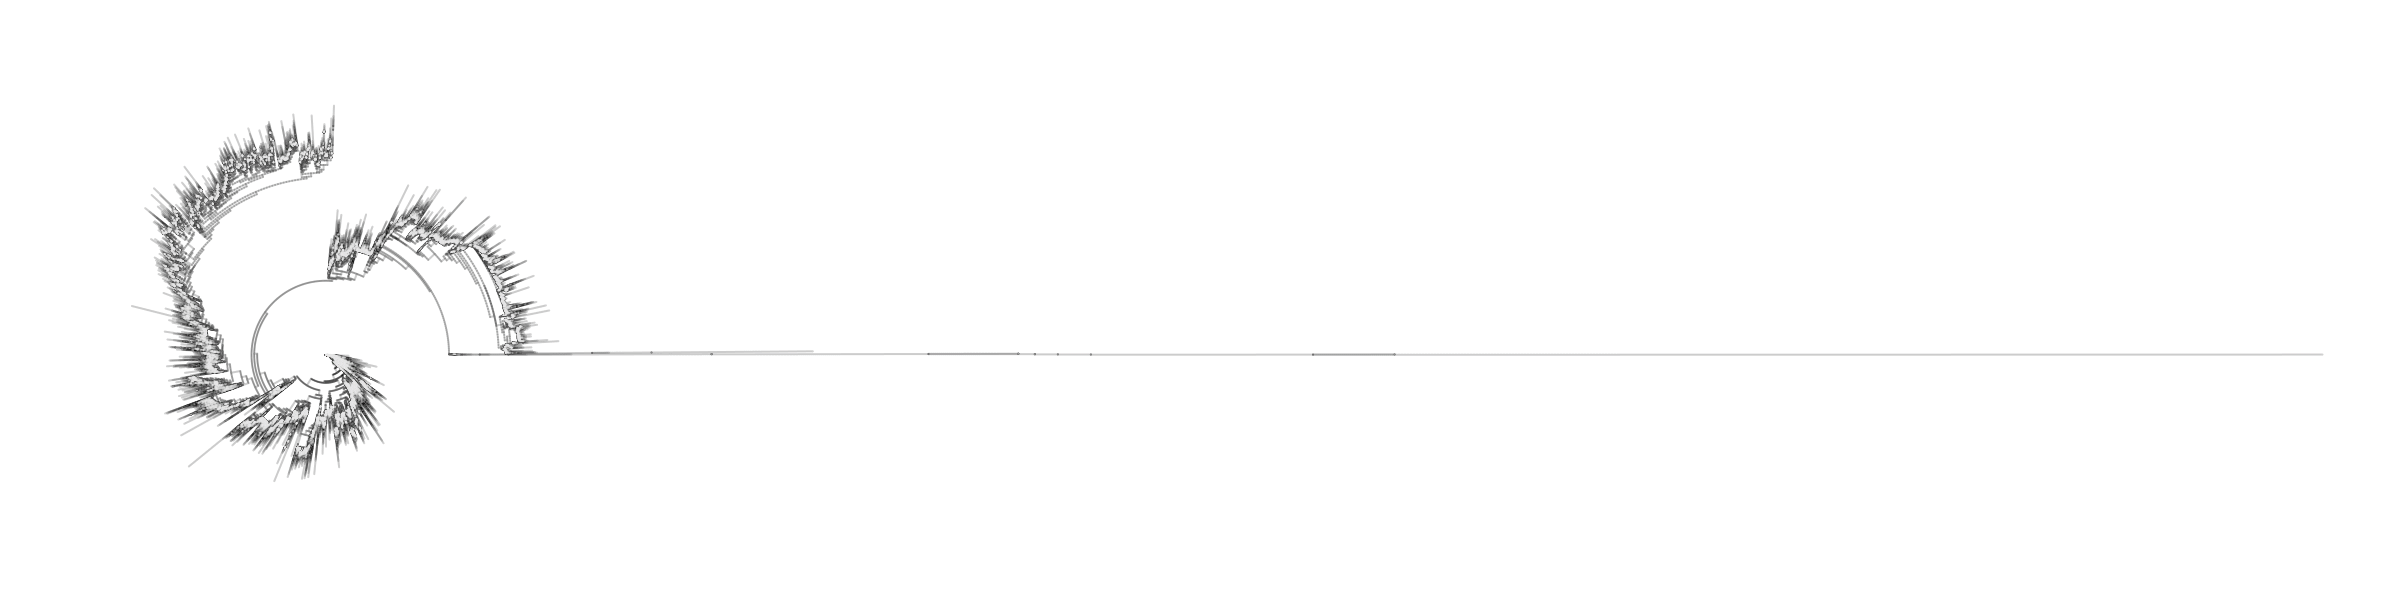

In [87]:
import Printf.@sprintf
import Plots:Animation, buildanimation  
nframes = length(visits)                
fnames = [@sprintf("%06d.png", k) for k  in 0:nframes]   
anim = Animation("plots/pc39_frames", fnames); #PDF is the folder name which contains the pngs
buildanimation(anim, "animation/pc39_tree.gif", fps = 0.5, show_msg=false) #set a suitable fps